# Building Acyclic Diagrams for the paper using daft

In [1]:
from matplotlib import rc
import matplotlib.pyplot as plt
import sys
rc("font", family="serif", size=12)
rc("text", usetex=True)

import daft

## Gaia model

\begin{equation}
p(\theta_{\rm RC}, \varpi_{\rm zp}, L, \alpha | \mathcal{D}) 
\propto  p(\theta_{\rm RC}, \varpi_{\rm zp}, L)\ p(\hat{\varpi} | r, \varpi_{\rm zp}, \underline{\Sigma})\ \times 
\prod_{i=1}^{\rm N} p(\hat{m}_i | \alpha_i, \sigma_{\hat{m}_i})\ p(\alpha_i | \theta_{\rm RC}, \varpi_{\rm zp}, L)
\end{equation}

where $\theta_{RC}$, $\varpi_{\rm zp}$ and $L$ are hyperparameters, $\alpha$ is the set of latent parameters (which includes the latent parameter $r$). Anything with a hat on it is our data $\mathcal{D}$. $\underline{\Sigma}$ is a covariance matrix. N is the number of data points.

In [2]:
#Instantiate the PGM
pgm = daft.PGM(shape=[3.4, 3.8], 
               origin=[0.0, 0.0],
               backset=.05,
              label_params={'fontsize':12})

#Hiearchical parameters
pgm.add_node(daft.Node("mu", r"$\mu_{RC}$", .27, 1.35))
pgm.add_node(daft.Node("sigma", r"$\sigma_{RC}$", .27, 2.))
pgm.add_node(daft.Node("Q", r"$Q$", .27, 2.65))
pgm.add_node(daft.Node("sigo", r"$\sigma_o$",.27,3.3))

pgm.add_node(daft.Node("L", r"$L$",2.075, 3.3))
pgm.add_node(daft.Node("oozp", r"$\varpi_{zp}$", 2.95, 2.4))

#Add a plate
pgm.add_plate(daft.Plate([.6, .2, 1.9, 2.7], label=r"$i = 1, \cdots, \rm N$",shift=-0.1))

#Latent varable.
pgm.add_node(daft.Node("Mi", r"$M_i$", 1.15, 2.4))
pgm.add_node(daft.Node("Ai", r"$A_i$", 2.075, 1.6))
pgm.add_node(daft.Node("ri", r"$r_i$", 2.075, 2.4))

#Data
pgm.add_node(daft.Node("mi", r"$\hat{m}_i$", 1.15, 1.6, observed=True))
pgm.add_node(daft.Node("sigmi", r"$\sigma_{\hat{m}_i}$", 1.15, .9, fixed=True, offset=(0,-24.)))
pgm.add_node(daft.Node("ooi", r"$\hat{\varpi}$",   2.95, 1.6, observed=True))
pgm.add_node(daft.Node("sigooi",r"$\underline{\Sigma}$", 2.95, .9, fixed=True, offset=(0,-24.)))
# pgm.add_node(daft.Node("rlebv", r"$R_{\lambda}E_{B-V}$", 2.075, .9, fixed=True, offset=(0,-22.)))
pgm.add_node(daft.Node("rlebv", r"$\hat{A}_i$", 2.075, .9, fixed=True, offset=(0,-24.)))


#Add in edges
pgm.add_edge("mu", "Mi")
pgm.add_edge("sigma", "Mi")
pgm.add_edge("Q", "Mi")
pgm.add_edge("sigo", "Mi")
pgm.add_edge("oozp", "ooi")
pgm.add_edge("L", "ri")
pgm.add_edge("Ai", "mi")
pgm.add_edge("Mi", "mi")
pgm.add_edge("ri", "mi")
pgm.add_edge("ri", "ooi")
pgm.add_edge("rlebv", "Ai")
pgm.add_edge("sigmi", "mi")
pgm.add_edge("sigooi", "ooi")

/home/oliver/.local/lib/python2.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family [u'serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


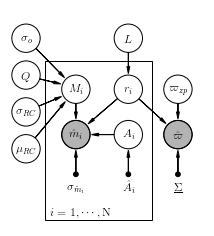

In [3]:
pgm.render()
pgm.figure.savefig("Figures/gaiastan_alt.pdf")
pgm.figure.savefig("Figures/gaiastan_alt.png", dpi=300)
plt.show()

# Astero Model

\begin{equation}
p(\theta_{\rm RC} | \mathcal{D}) \propto  p(\theta_{\rm RC}) \prod_{i=1}^{\rm N} p(\mathcal{D}_i | \theta_{\rm RC})p(M_i | \theta_{\rm RC})
\end{equation}
where $\theta_{RC}$ are hyperparameters, and $M_i$ is our latent parameters. Anything with a hat on it is our data $\mathcal{D}$. N is the number of data points.

In [4]:
#Instantiate the PGM
pgm = daft.PGM(shape=[3.,3.], 
               origin=[0.0, 0.0],
               backset=0.05,
              label_params={'fontsize':13})

#Hiearchical parameters
pgm.add_node(daft.Node("mu", r"$\mu_{RC}$", .5, .6))
pgm.add_node(daft.Node("sigma", r"$\sigma_{RC}$", .5, 1.2))
pgm.add_node(daft.Node("Q", r"$Q$", .5, 1.8))
pgm.add_node(daft.Node("sigo", r"$\sigma_o$", .5, 2.4))

#Add a plate
pgm.add_plate(daft.Plate([1., .9, 1.9, 1.6], label=r"$i = 1, \cdots, \rm N$",shift=-0.1, position='bottom right'))

#Latent varable.
pgm.add_node(daft.Node("Mi", r"$M_i$", 1.5, 1.5))

#Data
pgm.add_node(daft.Node("Mhati", r"$\hat{M}_i$", 2.5, 1.5, observed=True))
pgm.add_node(daft.Node("sigMhati", r"$\sigma_{\hat{M}_i}$", 2.5, 2., fixed=True, offset=(0,2.)))

# #Add in edges
pgm.add_edge("mu", "Mi")
pgm.add_edge("sigma", "Mi")
pgm.add_edge("Q", "Mi")
pgm.add_edge("sigo", "Mi")
pgm.add_edge("Mi", "Mhati")
pgm.add_edge("sigMhati", "Mhati")

/home/oliver/.local/lib/python2.7/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


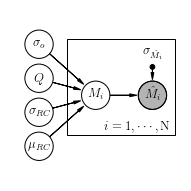

In [5]:
pgm.render()
plt.tight_layout()
pgm.figure.savefig("Figures/asterostan.pdf")
pgm.figure.savefig("Figures/asterostan.png", dpi=150)
plt.show()

# Old Gaia model

In [6]:
#Instantiate the PGM
pgm = daft.PGM(shape=[3.4, 3.8], 
               origin=[0.0, 0.0],
               backset=.05,
              label_params={'fontsize':12})

#Hiearchical parameters
pgm.add_node(daft.Node("mu", r"$\mu_{RC}$", .95, 3.3))
pgm.add_node(daft.Node("sigma", r"$\sigma_{RC}$", 1.6, 3.3))
pgm.add_node(daft.Node("Q", r"$Q$", 2.25, 3.3))
pgm.add_node(daft.Node("sigo", r"$\sigma_o$",2.9,3.3))

pgm.add_node(daft.Node("L", r"$L$",.27, .8))
pgm.add_node(daft.Node("oozp", r"$\varpi_{zp}$", .27, 1.7))

#Add a plate
pgm.add_plate(daft.Plate([.6, .2, 2.7, 2.7], label=r"$i = 1, \cdots, \rm N$",shift=-0.1))

#Latent varable.
pgm.add_node(daft.Node("Mi", r"$M_i$", 2.1, 2.5))
pgm.add_node(daft.Node("Ai", r"$A_i$", 2.10, .8))
pgm.add_node(daft.Node("ri", r"$r_i$", 1.15, .8))

#Data
pgm.add_node(daft.Node("mi", r"$\hat{m}_i$", 2.1, 1.7, observed=True))
pgm.add_node(daft.Node("sigmi", r"$\sigma_{\hat{m}_i}$", 2.85, 1.7, fixed=True, offset=(0,5.)))
pgm.add_node(daft.Node("ooi", r"$\hat{\varpi}_i$",  1.15, 1.7, observed=True))
# pgm.add_node(daft.Node("sigooi",r"$\sigma_{\hat{\varpi}_i}$", 1.15, 2.2, fixed=True, offset=(0,5.)))
pgm.add_node(daft.Node("sigooi",r"$\underline{\Sigma}$", 1.15, 2.2, fixed=True, offset=(0,5.)))
pgm.add_node(daft.Node("rlebv", r"$R_{\lambda}E_{B-V}$", 2.85, .8, fixed=True, offset=(0,5.)))

# #Add in edges
pgm.add_edge("mu", "Mi")
pgm.add_edge("sigma", "Mi")
pgm.add_edge("Q", "Mi")
pgm.add_edge("sigo", "Mi")
pgm.add_edge("oozp", "ooi")
pgm.add_edge("L", "ri")
pgm.add_edge("Ai", "mi")
pgm.add_edge("Mi", "mi")
pgm.add_edge("ri", "mi")
pgm.add_edge("ri", "ooi")
pgm.add_edge("rlebv", "Ai")
pgm.add_edge("sigmi", "mi")
pgm.add_edge("sigooi", "ooi")

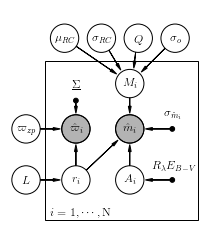

In [7]:
pgm.render()
pgm.figure.savefig("Figures/gaiastan.pdf")
pgm.figure.savefig("Figures/gaiastan.png", dpi=150)
plt.show()